<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Setup X and y (feature matrix and target vector)
3. Split X and y into train and test subsets.
4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   
5. Create your network.
   - Remember that for multi-class classification you need a softmax activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Train your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaining the activation functions on the hidden layers, etc.
8. Load in [Kaggle's](https://www.kaggle.com/c/digit-recognizer/data) `test.csv`
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for **_at least_** two of the four "configurations":

1. Using a `tensorflow` network (we did _not_ cover this in class!)
2. Using a `keras` convolutional network
3. Using a `keras` network with regularization
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L2,L1
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.regularizers import l1, l2, l1_l2

2022-10-29 13:38:22.769090: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df  = pd.read_csv('train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
# No NaN
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

In [6]:
# Set X,y
X = df.drop(columns='label')
y = df['label']



In [7]:
# splitting data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [8]:
# Cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


# normalize
X_train /= 255.0
X_test /= 255.0

In [9]:
# max values
X_train.values.max()

1.0

In [10]:
# 31500 images
X_train.shape

(31500, 784)

In [11]:
X_test.shape[0]

10500

In [12]:
# reshape the train & test 

X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
X_train.shape

(31500, 28, 28, 1)

In [14]:
X_test.shape

(10500, 28, 28, 1)

In [15]:
# One hot endocing y_values

y_train = utils.to_categorical(y_train,len(y.unique())) # nunqiue values
y_test =utils.to_categorical(y_test, len(y.unique()))

In [16]:
# Modeling

In [17]:
# CNN
cnn_model = Sequential()


# Add a convolutional layer

cnn_model.add(Conv2D(filters=6,
                    kernel_size=(3,3),
                    activation='relu',
                    input_shape=(28,28,1)))  
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

cnn_model.add(Conv2D(16,
                     kernel_size=(3,3),
                     activation='relu'))

cnn_model.add(MaxPooling2D(pool_size=(2,2)))


cnn_model.add(Flatten())

# Add a densely-connected layer with 128 neurons
cnn_model.add(Dense(128,activation='relu'))

# Add a final layer with 10 neurons
cnn_model.add(Dense(10,activation='softmax'))

2022-10-29 13:38:32.510411: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# Compile the model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [19]:
X_train.shape

(31500, 28, 28, 1)

In [20]:
# Check out the model summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 128)               5

In [21]:
# Fit the model on the training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=10,
                        verbose=1)

Epoch 1/10
124/124 [==============================] - 4s 28ms/step - loss: 0.8345 - accuracy: 0.7903 - val_loss: 0.2543 - val_accuracy: 0.9267
Epoch 2/10
124/124 [==============================] - 3s 26ms/step - loss: 0.1928 - accuracy: 0.9417 - val_loss: 0.1622 - val_accuracy: 0.9539
Epoch 3/10
124/124 [==============================] - 3s 24ms/step - loss: 0.1244 - accuracy: 0.9630 - val_loss: 0.1108 - val_accuracy: 0.9680
Epoch 4/10
124/124 [==============================] - 3s 24ms/step - loss: 0.0969 - accuracy: 0.9706 - val_loss: 0.0981 - val_accuracy: 0.9703
Epoch 5/10
124/124 [==============================] - 3s 25ms/step - loss: 0.0820 - accuracy: 0.9754 - val_loss: 0.0804 - val_accuracy: 0.9746
Epoch 6/10
124/124 [==============================] - 3s 27ms/step - loss: 0.0706 - accuracy: 0.9783 - val_loss: 0.0706 - val_accuracy: 0.9782
Epoch 7/10
124/124 [==============================] - 3s 28ms/step - loss: 0.0597 - accuracy: 0.9808 - val_loss: 0.0656 - val_accuracy: 0.9797

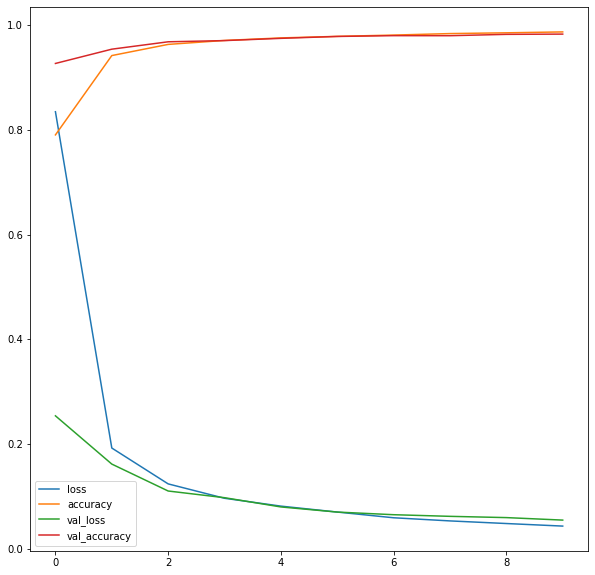

In [22]:
pd.DataFrame(history.history).plot(figsize=(10,10));

In [23]:
cnn_score = cnn_model.evaluate(X_test,
                               y_test,
                               verbose=1)

cnn_labels = cnn_model.metrics_names

# Compare CNN and FFNN models
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')
print()

329/329 [==============================] - 1s 3ms/step - loss: 0.0553 - accuracy: 0.9827
CNN loss  : 0.0553000271320343
CNN accuracy   : 0.9826666712760925



# Try regularizer

In [24]:
# CNN
cnn_model = Sequential()


# Add a convolutional layer

cnn_model.add(Conv2D(filters=6,
                    kernel_size=(3,3),
                    activation='relu',
                    input_shape=(28,28,1),kernel_regularizer=L2()))  


cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Convolution Layer
cnn_model.add(Conv2D(16,
                     kernel_size=(3,3),
                     activation='relu'))

cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
cnn_model.add(Flatten())

# Add a densely-connected layer with 128 neurons
cnn_model.add(Dense(128,activation='relu'))

# Add a final layer with 10 neurons
cnn_model.add(Dense(10,activation='softmax'))

In [25]:
# Compile the model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [26]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [27]:
# Fit the model on the training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=10,
                        verbose=1)

Epoch 1/10
124/124 [==============================] - 4s 28ms/step - loss: 0.8398 - accuracy: 0.7804 - val_loss: 0.3219 - val_accuracy: 0.9066
Epoch 2/10
124/124 [==============================] - 3s 27ms/step - loss: 0.2444 - accuracy: 0.9314 - val_loss: 0.2011 - val_accuracy: 0.9465
Epoch 3/10
124/124 [==============================] - 3s 27ms/step - loss: 0.1728 - accuracy: 0.9530 - val_loss: 0.1585 - val_accuracy: 0.9580
Epoch 4/10
124/124 [==============================] - 3s 28ms/step - loss: 0.1346 - accuracy: 0.9643 - val_loss: 0.1325 - val_accuracy: 0.9653
Epoch 5/10
124/124 [==============================] - 3s 28ms/step - loss: 0.1124 - accuracy: 0.9713 - val_loss: 0.1112 - val_accuracy: 0.9724
Epoch 6/10
124/124 [==============================] - 3s 27ms/step - loss: 0.1006 - accuracy: 0.9744 - val_loss: 0.1243 - val_accuracy: 0.9686
Epoch 7/10
124/124 [==============================] - 4s 28ms/step - loss: 0.0940 - accuracy: 0.9770 - val_loss: 0.0976 - val_accuracy: 0.9754

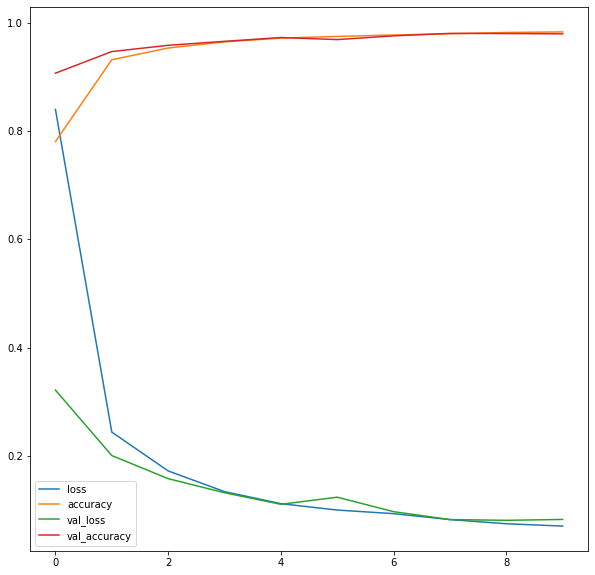

In [28]:
pd.DataFrame(history.history).plot(figsize=(10,10));

In [29]:
cnn_score = cnn_model.evaluate(X_test,
                               y_test,
                               verbose=1)

cnn_labels = cnn_model.metrics_names

# Compare CNN and FFNN models
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')
print()

329/329 [==============================] - 1s 3ms/step - loss: 0.0833 - accuracy: 0.9791
CNN loss  : 0.08327145874500275
CNN accuracy   : 0.9791428446769714



In [30]:
test_data = pd.read_csv('test.csv')

In [32]:
test_data = test_data.values.reshape(test_data.shape[0],28,28,1)

In [33]:
test_data.shape

(28000, 28, 28, 1)

In [34]:
y_pred = cnn_model.predict(test_data)

875/875 [==============================] - 3s 3ms/step


In [35]:
pd.DataFrame({'ImageId':[i for i in range(1,28001)],'Label' : np.argmax(y_pred, axis=1)}).to_csv('submission.csv')